In [2]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series

* 데이터변형

In [13]:
#map을 이용

df=DataFrame({'name':['kim','lee','bae','cho','kang'],'sex':[1,2,2,1,1],'home':['마포','수지','처인','용산','종로'],'income':[250,195,325,210,np.inf]})
num_to_str={1:'남',2:'여'}
to_city={'마포':'서울','용산':'서울','종로':'서울','수지':'용인','처인':'용인'}

In [14]:
df.index

RangeIndex(start=0, stop=5, step=1)

In [15]:
df.columns

Index(['name', 'sex', 'home', 'income'], dtype='object')

In [16]:
df.index=df.index.map({0:'st1',1:'st2',2:'st2',3:'st3',4:'st5'})   #인덱스값들을 st로 수정해줌

In [17]:
df.columns=df.columns.map({'name':'fn','sex':'gender','home':'house','incom':'ic'}) #columns들을 바꿈

In [18]:
df

,fn,gender,house,nan
st1,kim,1,마포,250.0
st2,lee,2,수지,195.0
st2,bae,2,처인,325.0
st3,cho,1,용산,210.0
st5,kang,1,종로,inf


* 일부만변형 -rename

In [19]:
df

,fn,gender,house,nan
st1,kim,1,마포,250.0
st2,lee,2,수지,195.0
st2,bae,2,처인,325.0
st3,cho,1,용산,210.0
st5,kang,1,종로,inf


In [23]:
df.rename(index={'st1':201900012,'st3':20192123},columns={'fn':'으아아아아'},inplace=True)

In [24]:
df

,으아아아아,gender,house,nan
201900012,kim,1,마포,250.0
st2,lee,2,수지,195.0
st2,bae,2,처인,325.0
20192123,cho,1,용산,210.0
st5,kang,1,종로,inf


# 계급화


숫자:양적자료
문자:범주형자료


In [42]:
np.random.seed(1234)

x=np.random.binomial(n=100,p=0.5,size=100)

In [43]:
pd.value_counts(x)

51    11
48    11
49     9
52     9
46     9
47     6
43     5
55     5
53     5
50     5
45     4
57     3
54     3
59     3
44     2
41     2
60     2
58     2
56     1
42     1
40     1
39     1
dtype: int64

In [33]:
cls=[35,40,45,50,55,60]  #계급=bins
cls_x=pd.cut(x,cls,right=True,include_lowest=True)  

* right=True  :  오른쪽(상한)을 포함하겠다.

*include_lowest=True   : 첫번째(35만 포함하겠다) ,, 원래는 하한은 포함안되니까

In [34]:
cls_x

[(45.0, 50.0], (50.0, 55.0], (50.0, 55.0], (45.0, 50.0], (55.0, 60.0], ..., (45.0, 50.0], (50.0, 55.0], (40.0, 45.0], (45.0, 50.0], (50.0, 55.0]]
Length: 100
Categories (5, interval[float64]): [(34.999, 40.0] < (40.0, 45.0] < (45.0, 50.0] < (50.0, 55.0] < (55.0, 60.0]]

In [45]:
pd.value_counts(cls_x)

(45.0, 50.0]      40
(50.0, 55.0]      33
(40.0, 45.0]      14
(55.0, 60.0]      11
(34.999, 40.0]     2
dtype: int64

In [52]:
pd.cut(x,bins=7,right=True,labels==['a','b','c','d','e','f','e'],include_lowest=True)   #bins=7 : 범위를7개로

SyntaxError: positional argument follows keyword argument (<ipython-input-52-60d31022e521>, line 1)

In [54]:
pd.qcut(x=x,q=5)

[(46.0, 48.0], (51.0, 53.0], (53.0, 60.0], (46.0, 48.0], (53.0, 60.0], ..., (46.0, 48.0], (51.0, 53.0], (38.999, 46.0], (48.0, 51.0], (51.0, 53.0]]
Length: 100
Categories (5, interval[float64]): [(38.999, 46.0] < (46.0, 48.0] < (48.0, 51.0] < (51.0, 53.0] < (53.0, 60.0]]

In [59]:
np.mean(np.random.binomial(size=10000,p=0.5,n=20))

9.9985

In [100]:
np.random.seed(1234)

df=DataFrame(np.random.randn(500,4),columns=['v1','v2','v3','v4',])  #3넘어가면 특이값으로본다
df.describe()

,v1,v2,v3,v4
count,500.000000,500.000000,500.000000,500.000000
mean,0.047732,-0.012134,0.008853,0.070554
std,0.957532,1.014059,0.977214,0.980948
min,-2.596062,-3.563517,-3.880898,-2.531883
25%,-0.623753,-0.712665,-0.626654,-0.587225
50%,0.028628,0.010484,0.009914,0.027025
75%,0.695728,0.674915,0.658109,0.672995
max,2.651999,3.109635,2.550784,3.125635


In [64]:
df

,v1,v2,v3,v4
0,0.471435,-1.190976,1.432707,-0.312652
1,-0.720589,0.887163,0.859588,-0.636524
2,0.015696,-2.242685,1.150036,0.991946
3,0.953324,-2.021255,-0.334077,0.002118
4,0.405453,0.289092,1.321158,-1.546906
5,-0.202646,-0.655969,0.193421,0.553439
6,1.318152,-0.469305,0.675554,-1.817027
7,-0.183109,1.058969,-0.397840,0.337438
8,1.047579,1.045938,0.863717,-0.122092
9,0.124713,-0.322795,0.841675,2.390961


In [71]:
col=df['v3']

In [70]:
col[np.abs(col)>3]

20    -3.563517
333    3.109635
Name: v2, dtype: float64

In [73]:
np.abs(df)>3

,v1,v2,v3,v4
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [83]:
(np.abs(df)>3).any(axis=1)  # 행(axis=1)에 하나라도 True가 있느냐

In [85]:
col=df['v3']

In [91]:
df[(np.abs(df)>3).any(axis=1)]  #적어도하나가 3보다크거나 -3보다 작은 행을 추출

,v1,v2,v3,v4
20,0.464392,-3.563517,1.321106,0.152631
326,0.175091,-1.241138,0.614358,3.125635
333,-0.368085,3.109635,-0.623207,0.977718
417,-0.064638,-1.204956,-3.880898,0.974470


In [92]:
df[~(np.abs(df)>3).any(axis=1)]  #절대값이 3보다큰놈을 제외


,v1,v2,v3,v4
0,0.471435,-1.190976,1.432707,-0.312652
1,-0.720589,0.887163,0.859588,-0.636524
2,0.015696,-2.242685,1.150036,0.991946
3,0.953324,-2.021255,-0.334077,0.002118
4,0.405453,0.289092,1.321158,-1.546906
5,-0.202646,-0.655969,0.193421,0.553439
6,1.318152,-0.469305,0.675554,-1.817027
7,-0.183109,1.058969,-0.397840,0.337438
8,1.047579,1.045938,0.863717,-0.122092
9,0.124713,-0.322795,0.841675,2.390961


In [104]:
np.sign(df)

,v1,v2,v3,v4
0,1.0,-1.0,1.0,-1.0
1,-1.0,1.0,1.0,-1.0
2,1.0,-1.0,1.0,1.0
3,1.0,-1.0,-1.0,1.0
4,1.0,1.0,1.0,-1.0
5,-1.0,-1.0,1.0,1.0
6,1.0,-1.0,1.0,-1.0
7,-1.0,1.0,-1.0,1.0
8,1.0,1.0,1.0,-1.0
9,1.0,-1.0,1.0,1.0


In [103]:
df[np.abs(df)>3]=np.sign(df)*3   #sign= 부호돌려줌
#   절대값 3보다큰놈 = -1*3 or 1*3


# 3보다큰놈은 3으로만들어줌,-3보다작은놈은 -3으로

#5인가구이상인건 5인가구로 취급하는거처럼

In [102]:
df.describe()

,v1,v2,v3,v4
count,500.000000,500.000000,500.000000,500.000000
mean,0.047732,-0.011226,0.010615,0.070303
std,0.957532,1.009744,0.970961,0.980180
min,-2.596062,-3.000000,-3.000000,-2.531883
25%,-0.623753,-0.712665,-0.626654,-0.587225
50%,0.028628,0.010484,0.009914,0.027025
75%,0.695728,0.674915,0.658109,0.672995
max,2.651999,3.000000,2.550784,3.000000


* dummy  - 인지아닌지만 1,0 으로 표시해줌

In [106]:
df=DataFrame({'name':['kim','lee','bae','cho','kang'],'sex':['m','m','f','f','m',],'home':['마포','수지','처인','용산','종로'],'income':[250,195,325,210,np.inf]})
num_to_str={1:'남',2:'여'}
to_city={'마포':'서울','용산':'서울','종로':'서울','수지':'용인','처인':'용인'}

In [109]:
gneder_d=pd.get_dummies(df['sex'],prefix='sex_')

In [110]:
gneder_d

,sex__f,sex__m
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1


# 자료시각화 - matplotlib


In [112]:
import matplotlib.pyplot as plt

In [1]:
from md import *

In [4]:
from matplotlib import font_manager

In [5]:
x=np.arange(10)

### 함수형태로 그려주기

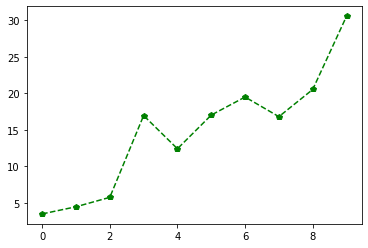

In [6]:
y=1.5+2.7*x+np.random.randn(10)*3
plt.plot(x,y,'gp--')
plt.show()

Text(0.5, 1.0, '산포도')

C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\matplotlib\backends\backend_agg.py:180

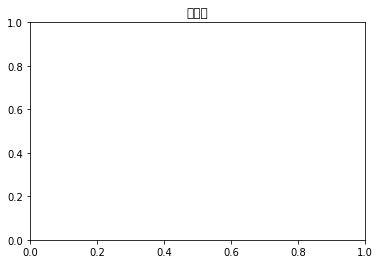

In [7]:
plt.title('산포도')

In [16]:
#한글 폰트적용하기

font_fname='C:\Windows\Fonts\H2GSRB.TTF'
font=font_manager.FontProperties(fname=font_fname).get_name()
font_family=font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams['font.family']=font_family

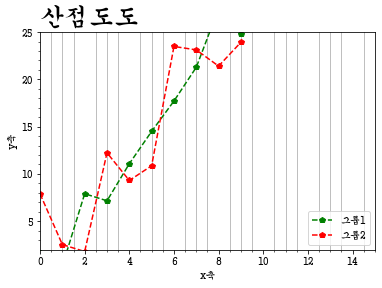

In [39]:
y1=1.5+2.7*x+np.random.randn(10)*3
y2=1.5+2.7*x+np.random.randn(10)*3
plt.plot(x,y1,'gp--')

plt.plot(x,y2,'rp--') 
plt.title('산점도도',fontdict={'fontsize':25,'fontweight':'bold'},loc='left')  #fontdict=사전형태로 사이즈 이런거지정:
plt.xlabel('x축')
plt.ylabel('y축')
plt.legend(['그룹1','그룹2'],loc='lower right')
plt.axis(xmin=0,xmax=15,ymin=2,ymax=25)
plt.minorticks_on()  #보조눈금선
plt.grid(b=True,which='minor',axis='x')  #격자
plt.show()


In [40]:
df=pd.read_csv('APTData.csv', header=0,skiprows=7,index_col=None,encoding='utf-8')

In [41]:
df

,id,Area,UseDistrict,Option,FAR,Price
0,apt01,도심권,제2종 일반주거지역,풀옵션형,132.7200,515.051949
1,apt02,도심권,제2종 일반주거지역,풀옵션형,184.9900,499.500499
2,apt03,도심권,상업지역,기본형,308.8100,364.319535
3,apt04,도심권,상업지역,풀옵션형,493.0800,410.945530
4,apt05,도심권,준주거지역,기본형,349.6500,616.975986
5,apt06,도심권,제3종 일반주거지역,풀옵션형,248.9728,469.151797
6,apt07,도심권,제3종 일반주거지역,풀옵션형,227.2000,576.476262
7,apt08,도심권,상업지역,풀옵션형,254.3700,355.871886
8,apt09,동북권,제2종 일반주거지역,기본형,199.9300,423.812340
9,apt10,동북권,제2종 일반주거지역,풀옵션형,198.1300,518.313753


In [43]:
AreaTbl=pd.value_counts(df['Area'])


In [44]:
AreaTbl

동북권    140
동남권     92
서북권     81
서남권     76
도심권     11
Name: Area, dtype: int64

* 막대그래프

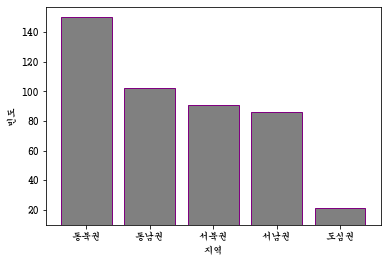

In [50]:
plt.bar(AreaTbl.index,AreaTbl.values, bottom=10,color='grey',edgecolor='purple')
plt.xlabel('지역')
plt.ylabel('빈도')
plt.show()

* 원그래프

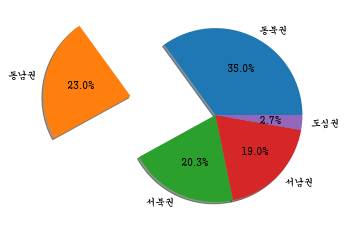

In [67]:
plt.pie(AreaTbl.values,explode=(0,1,0,0,0),labels=AreaTbl.index,shadow=True,autopct='%5.1f%%')  # explode : 뺄조각 선택


plt.show()

* 상자그래프

ValueError: Dimensions of labels and X must be compatible

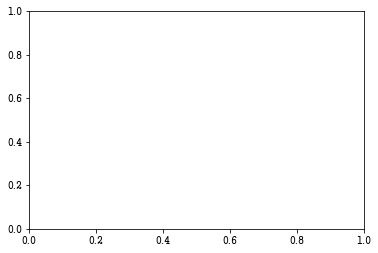

In [82]:
plt.boxplot(df.Price,notch=True,vert=False,showmeans=True,labels=['임대료','용적률'],whis=3)   #notch=신뢰구간, showmeans=평균표시

plt.show()

* 히스토그램

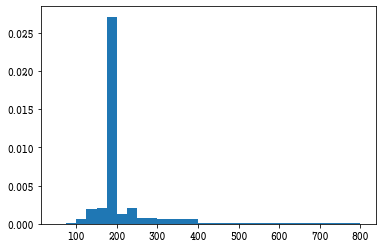

In [87]:
plt.hist(df['FAR'],bins=[50,75,100,125,150,175,200,225,250,300,400,800],density=True)
plt.show()

* 산점도

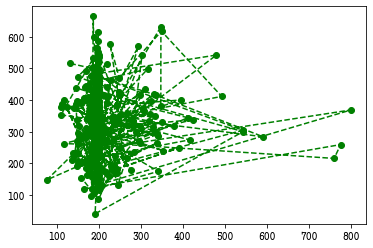

In [88]:
plt.plot(df['FAR'],df['Price'],'go--')
plt.show()

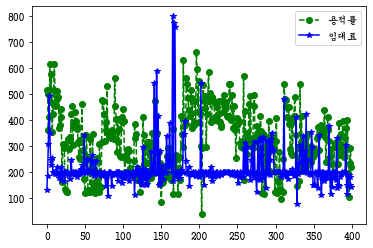

In [95]:
plt.plot(df.Price,'go--')
plt.plot(df.FAR,'b*-')


plt.legend(['용적률','임대료'],loc='upper right')
plt.show()

* subplot

{'whiskers': [<matplotlib.lines.Line2D at 0x21d950083c8>,
 'caps': [<matplotlib.lines.Line2D at 0x21d95008a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d950080b8>],
 'medians': [<matplotlib.lines.Line2D at 0x21d95015128>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d95015470>],
 'means': []}

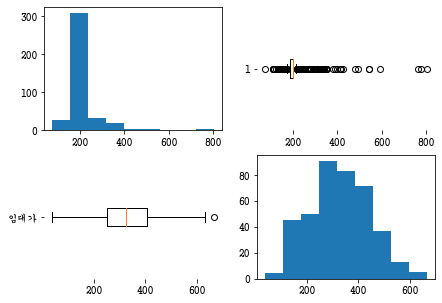

In [104]:
plt.figure(figsize=(7,5))   #피겨사이즈 설정


plt.subplot(221)  #2행 2열에서 1번쨰
plt.hist(df.FAR,bins=9)

plt.subplot(224)  #2행2열에서 4번째   
plt.hist(df.Price,bins=9)

plt.subplot(222,frameon=False)  #frameon=False  프레임없앰

plt.boxplot(df.FAR,vert=False)
plt.subplot(223,frameon=False)
plt.boxplot(df.Price,vert=False,labels=['임대가'])

plt.figure(figsize=(7,5))   #피겨사이즈 설정


plt.subplot(211)  #2행 2열에서 1번쨰
plt.hist(df.FAR,bins=9)

plt.subplot(224)  #2행2열에서 4번째   
plt.hist(df.Price,bins=9)

plt.subplot(223,frameon=False)
plt.boxplot(df.Price,vert=False,labels=['임대가'])

# pandas 그래프

In [108]:
df  #수치형자료 :Price, FAR

,id,Area,UseDistrict,Option,FAR,Price
0,apt01,도심권,제2종 일반주거지역,풀옵션형,132.7200,515.051949
1,apt02,도심권,제2종 일반주거지역,풀옵션형,184.9900,499.500499
2,apt03,도심권,상업지역,기본형,308.8100,364.319535
3,apt04,도심권,상업지역,풀옵션형,493.0800,410.945530
4,apt05,도심권,준주거지역,기본형,349.6500,616.975986
5,apt06,도심권,제3종 일반주거지역,풀옵션형,248.9728,469.151797
6,apt07,도심권,제3종 일반주거지역,풀옵션형,227.2000,576.476262
7,apt08,도심권,상업지역,풀옵션형,254.3700,355.871886
8,apt09,동북권,제2종 일반주거지역,기본형,199.9300,423.812340
9,apt10,동북권,제2종 일반주거지역,풀옵션형,198.1300,518.313753


Text(0.5, 0, '지역현황')

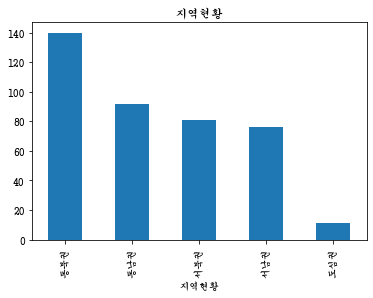

In [118]:
AreaTbl=pd.value_counts(df.Area)
AreaTbl.plot.bar()  #얘도 데이터프레임이라 매소드가지고있음

plt.title('지역현황')
plt.xlabel('지역현황')


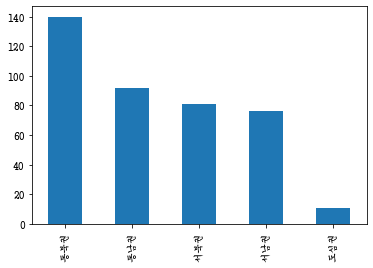

In [120]:
AreaTbl.plot(kind='bar')   #이렇게써도됌

In [123]:
#분할표

crtab=pd.crosstab(df.Area,df.Option)
crtab

Option,기본형,풀옵션형
Area,,
도심권,4,7
동남권,2,90
동북권,30,110
서남권,26,50
서북권,38,43


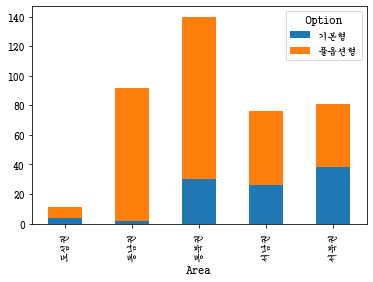

In [132]:
CrossTbl=pd.crosstab(df.Area,df.Option)
CrossTbl.plot(kind='bar',stacked=True)  #stacked=True  = 누적막대그래프

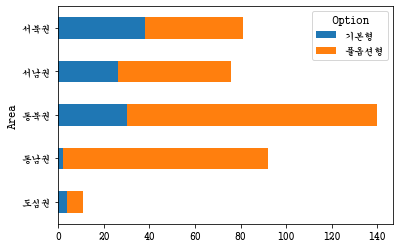

In [135]:
CrossTbl.plot(kind='barh',stacked=True)  #barh  =  수평 막대 그래프

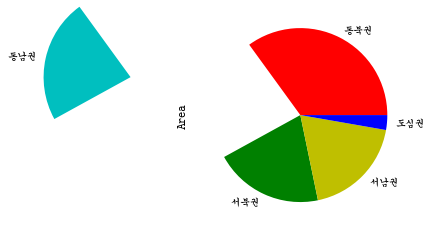

In [147]:


AreaTbl.plot(kind='pie', explode=(0,2,0,0,0),colors=['r','c','g','y','b'])

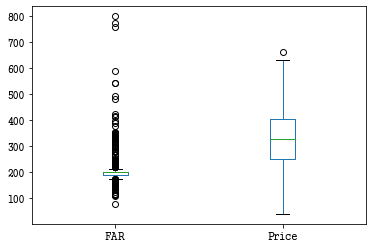

In [148]:
df.plot.box()

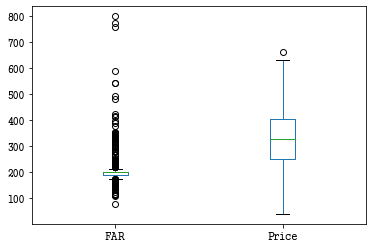

In [150]:
df[['FAR','Price']].plot.box()  #필요한 자료만뽑을수있다인덱싱으로


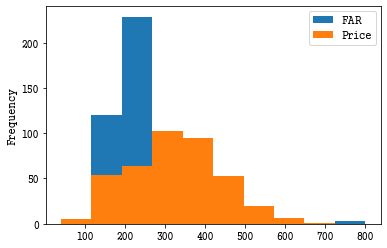

In [152]:
df[['FAR','Price']].plot.hist()  #겹쳐서 안보인다=>투명도 조절

C:\ProgramData\Anaconda3\envs\mp\lib\site-packages\pandas\plotting\_core.py:185: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


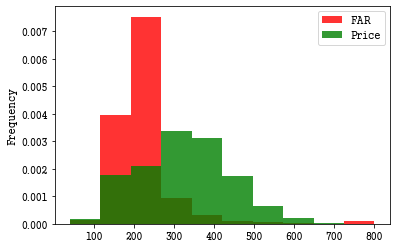

In [162]:
df[['FAR','Price']].plot.hist(colors=['r','g'],alpha=0.8,bins=10,density=True)  #alpha=투명도조절

In [174]:
df=pd.read_csv('pilot.csv',skiprows=8,header=0,index_col=None,encoding='utf-8')
df.replace({'G':{1:'엔지니어 수습생',2:'파일럿'}},inplace=True)

In [175]:
df

,G,X1,X2,X3,X4,X5,X6
0,엔지니어 수습생,121,22,74,223,54,254
1,엔지니어 수습생,108,30,80,175,40,300
2,엔지니어 수습생,122,49,87,266,41,223
3,엔지니어 수습생,77,37,66,178,80,209
4,엔지니어 수습생,140,35,71,175,38,261
5,엔지니어 수습생,108,37,57,241,59,245
6,엔지니어 수습생,124,39,52,194,72,242
7,엔지니어 수습생,130,34,89,200,85,242
8,엔지니어 수습생,149,55,91,198,50,277
9,엔지니어 수습생,129,38,72,162,47,268


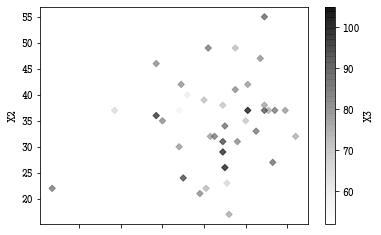

In [178]:
df.plot(kind='scatter',x='X1',y='X2',c='X3',marker='D',alpha=0.7)  #c값에따라 색상지정

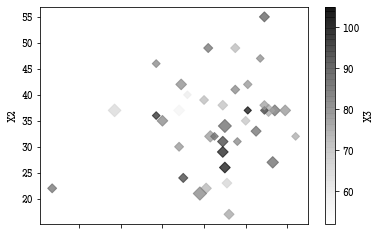

In [180]:
df.plot(kind='scatter',x='X1',y='
        X2',c='X3',marker='D',s=df.X5,alpha=0.7)  #점의크기로 값표현

In [181]:
df

,G,X1,X2,X3,X4,X5,X6
0,엔지니어 수습생,121,22,74,223,54,254
1,엔지니어 수습생,108,30,80,175,40,300
2,엔지니어 수습생,122,49,87,266,41,223
3,엔지니어 수습생,77,37,66,178,80,209
4,엔지니어 수습생,140,35,71,175,38,261
5,엔지니어 수습생,108,37,57,241,59,245
6,엔지니어 수습생,124,39,52,194,72,242
7,엔지니어 수습생,130,34,89,200,85,242
8,엔지니어 수습생,149,55,91,198,50,277
9,엔지니어 수습생,129,38,72,162,47,268


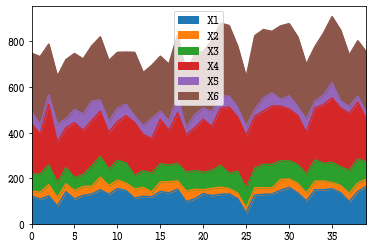

In [183]:
df.plot.area() #영역도표

* seaborn

In [184]:
df=pd.read_csv('pilot.csv',skiprows=8,header=0,index_col=None,encoding='utf-8')
df.replace({'G':{1:'엔지니어 수습생',2:'파일럿'}},inplace=True)


In [186]:
df=pd.read_csv('APTData.csv', header=0,skiprows=7,index_col=None,encoding='utf-8')

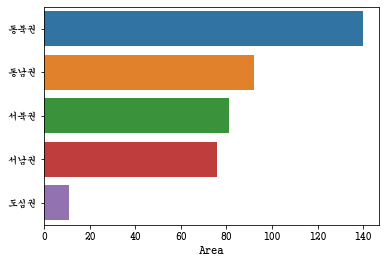

In [192]:
AreaTbl=pd.value_counts(df.Area)
sns.barplot(y=AreaTbl.index,x=AreaTbl,orient='h')  # h=수평그래프,,  x,y도 바뀌어야함

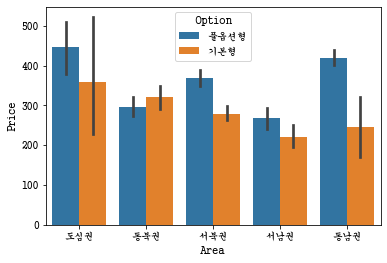

In [194]:
sns.barplot(data=df,x='Area',y='Price',hue='Option')  #hue = 막대의높이=평균치/ 검은막대= 신뢰구간/hue=집단(Option)에 따라서 색구분한다.

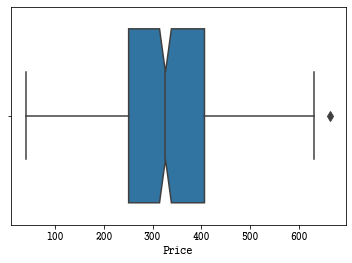

In [206]:
sns.boxplot(y=df.Price,orient='h',notch=True,fliersize=7.7)

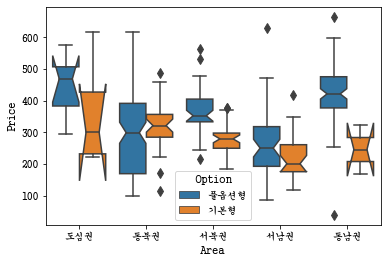

In [211]:
sns.boxplot(data=df,x=df.Area,y=df.Price,notch=True,fliersize=7.07,hue='Option')

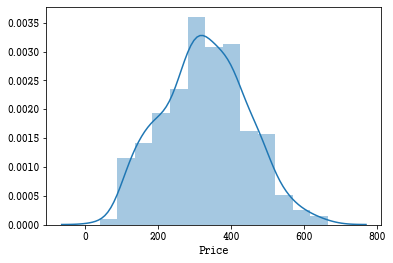

In [213]:
#커널밀도곡선

sns.distplot(df.Price, bins=13)

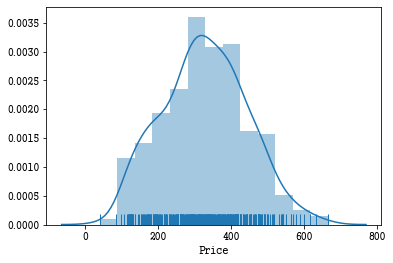

In [215]:
sns.distplot(df.Price, bins=13,rug=True)  #rug= 밀집도를 하단에 선으로 표시

* 선점도 - 두변수간에 관계보려고 사용(회귀모형)

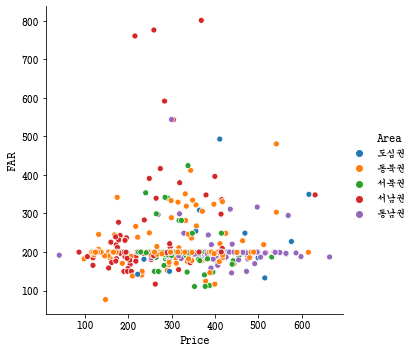

In [217]:
sns.relplot(x='Price',y="FAR",data=df,kind='scatter',hue='Area')

In [219]:
df=pd.read_csv('pilot.csv',skiprows=8,header=0,index_col=None,encoding='utf-8')
df.replace({'G':{1:'엔지니어 수습생',2:'파일럿'}},inplace=True)

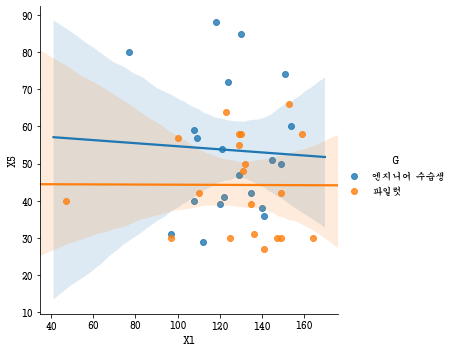

In [224]:
 sns.lmplot(x='X1',y='X5',data=df,hue='G')   #회귀직선이랑 같이보여줌, hue=집단별효과

* 산점도 행렬

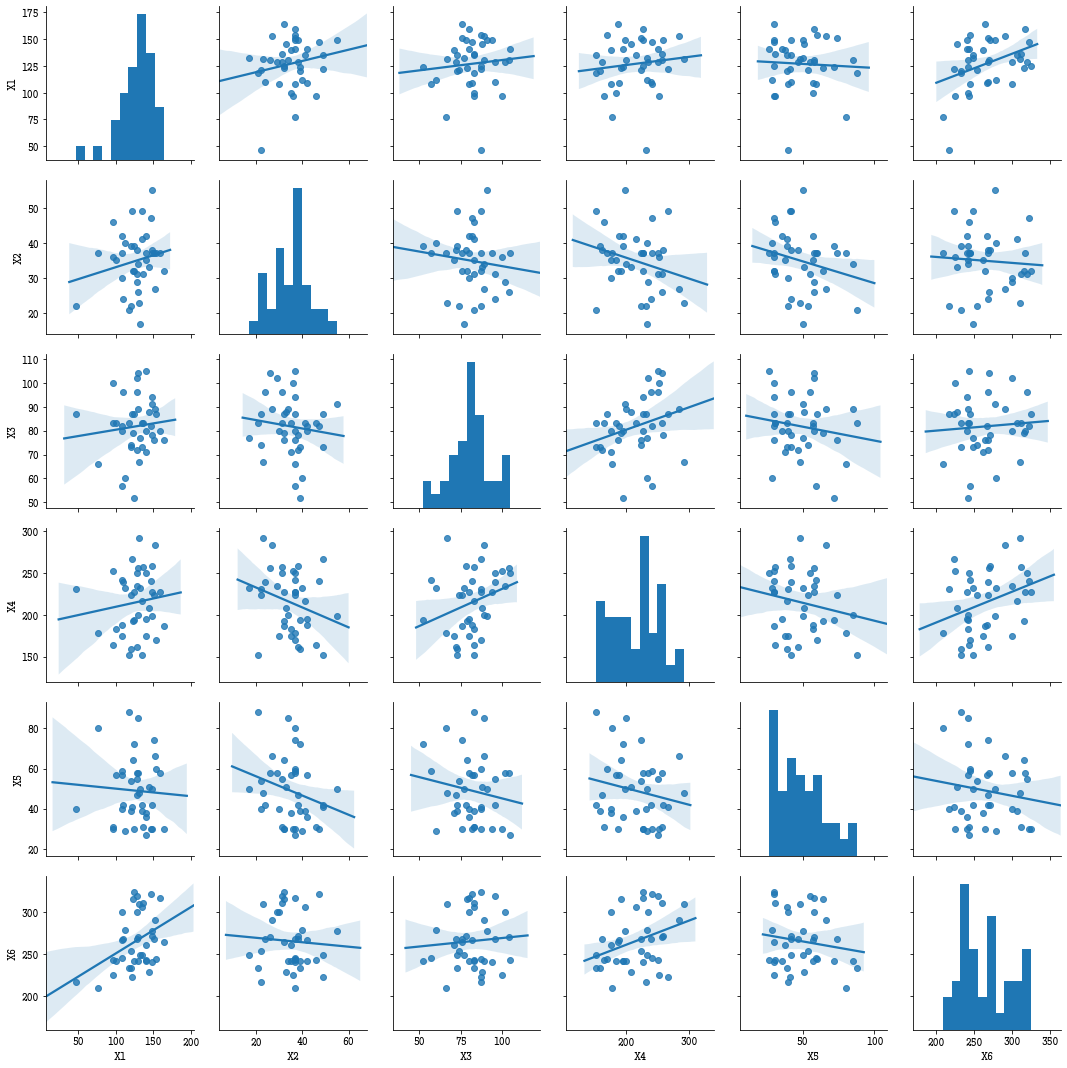

In [227]:
sns.pairplot(data=df,kind='reg')  #대각성분=x1,x2,x3... 의 히스토그램, reg=회귀직선

* plotly 동적인그래프 작성가능

In [228]:
import plotly.graph_objs as go
import plotly as ply

In [244]:
data=pd.read_csv('APTData.csv',skiprows=7)
data=[go.Pie(text=AreaTbl.index,values=AreaTbl.values,opacity=0.7)]


In [245]:
layout=go.Layout(title='원그래프')
figure=go.Figure(data=data,layout=layout)
ply.offline.plot(figure,filename='piechart.html')

'piechart.html'

data=[go.Bar(x=df.Area,y=AreaTbl.values)]
layout=go.Layout(title='원그래프')
figure=go.Figure(data=data,layout=layout)
ply.offline.plot(figure,filename='barchart.html')

In [247]:
df

,G,X1,X2,X3,X4,X5,X6
0,엔지니어 수습생,121,22,74,223,54,254
1,엔지니어 수습생,108,30,80,175,40,300
2,엔지니어 수습생,122,49,87,266,41,223
3,엔지니어 수습생,77,37,66,178,80,209
4,엔지니어 수습생,140,35,71,175,38,261
5,엔지니어 수습생,108,37,57,241,59,245
6,엔지니어 수습생,124,39,52,194,72,242
7,엔지니어 수습생,130,34,89,200,85,242
8,엔지니어 수습생,149,55,91,198,50,277
9,엔지니어 수습생,129,38,72,162,47,268


In [246]:
data=[go.Box(x=df.Area,y=df.Price,boxmean=True,jitter=True)]  #jitter : 흩어뿌리기
layout=go.Layout(title='원그래프')
figure=go.Figure(data=data,layout=layout)
ply.offline.plot(figure,filename='barchart.html')

AttributeError: 'DataFrame' object has no attribute 'Area'

In [248]:
from bokeh.plotting import figure, output_file,output_notebook, show

In [253]:
p=figure(title='막대',x_axis_label='x',y_axis_label='y')

p.hbar(y=[1,2,3,4,5],height=0.5,right=AreaTbl.values)
show(p)

In [250]:
df=pd.read_csv('APTData.csv',header=0,skiprows=7,encoding='utf-8')

In [251]:
AreaTbl

동북권    140
동남권     92
서북권     81
서남권     76
도심권     11
Name: Area, dtype: int64